In [2]:
pip install neuron

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 48.5 MB/s eta 0:00:00


Changed dt


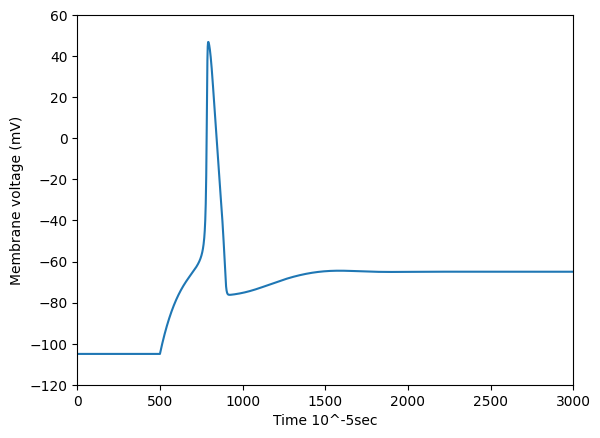

In [4]:
#FIGURE1-A

from neuron import h
h.load_file("stdrun.hoc")
# Define the Hodgkin-Huxley model
soma = h.Section(name='soma')
soma.insert('hh')
#soma.hh.temp = 6.3  # set temperature to 6.3°C
h.celsius=6.3

# Set up the voltage clamp
vclamp = h.VClamp(soma(0.5),sec=soma)
vclamp.dur[0] = 200  # duration of voltage clamp step
vclamp.amp[0] = -105  # voltage clamp amplitude
vclamp.dur[1] = 0  # duration of holding potential
vclamp.amp[1] = -65  # holding potential

# Set up the recording of membrane voltage
rec_t = h.Vector()
rec_t.record(h._ref_t)
rec_v = h.Vector()
rec_v.record(soma(0.5)._ref_v)

# Run the simulation up to the end of the voltage clamp step
h.dt = 0.1
h.tstop = 40
h.run()

# Run the rest of the simulation
h.continuerun(1000)
n = 7500
for i in range(n):
    rec_v.remove(0)

  
# Plot the results
import matplotlib.pyplot as plt
plt.plot(rec_v)
plt.xlabel('Time 10^-5sec')
plt.xlim(0,3000)
plt.ylim(-120,60)
plt.ylabel('Membrane voltage (mV)')
plt.show()

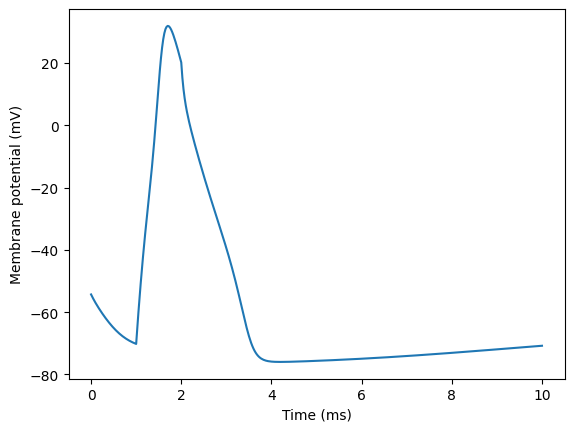

In [8]:
#FIGURE 1-B
from neuron import h, gui
import matplotlib.pyplot as plt

# Define simulation parameters
t_start = 0
t_end = 10 # 10 ms time course simulation
dt = 0.01 # time step size

# Define model parameters
soma = h.Section(name='soma')
soma.L = 20 # length of the soma
soma.diam = 20 # diameter of the soma
soma.insert('hh') # insert Hodgkin-Huxley channels
soma.gnabar_hh = 0.12 # maximum conductance of Na+ channels
soma.gkbar_hh = 0.036 # maximum conductance of K+ channels
soma.gl_hh = 0.0003 # maximum conductance of leak channels
soma.ena = 50 # Na+ reversal potential
soma.ek = -77 # K+ reversal potential
soma.el_hh = -54.3 # leak reversal potential
soma.cm = 1 # membrane capacitance
soma.insert('pas') # insert passive membrane properties
soma.g_pas = 0.00003 # passive conductance
soma.e_pas = -65 # passive reversal potential

# Define current input function
def I(t):
    if t >= 1 and t < 2:
        return 2.8 # 2mV depolarizing current
    else:
        return 0

# Create stimulus
stim = h.IClamp(soma(0.5))
stim.delay = 1 # stimulus delay (ms)
stim.dur = 1 # stimulus duration (ms)
stim.amp = 2.8 # stimulus amplitude (nA)

# Define recording vectors
t = h.Vector().record(h._ref_t) # time
soma_voltage = h.Vector().record(soma(0.5)._ref_v) # soma membrane potential

# Run simulation
h.finitialize(soma.el_hh)
h.continuerun(t_end)

# Plot membrane potential over time
plt.plot(t, soma_voltage)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.show()





Changed dt


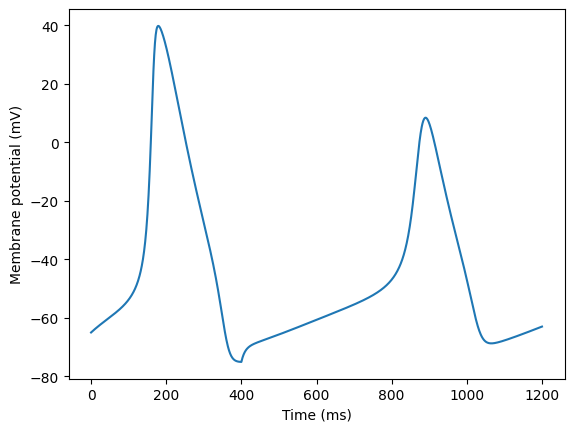

In [9]:
#FIGURE 1-C
from neuron import h, gui
h.load_file("stdrun.hoc")
# Create a soma compartment
soma = h.Section(name='soma')

# Insert passive membrane properties
soma.insert('pas')
soma.Ra = 100    # Axial resistance in Ohm*cm
soma.cm = 1      # Membrane capacitance in uF/cm^2
soma.g_pas = 1/30000   # Passive conductance in S/cm^2
soma.e_pas = -65  # Resting membrane potential in mV

# Insert an ion channel mechanism
soma.insert('hh')   # Hodgkin-Huxley mechanism

# Set the initial conditions
soma(0.5).v = -65   # Set the initial membrane potential in mV

# Define the stimulation protocol
stim1 = h.IClamp(soma(0.5))    # Current clamp at the soma center
stim1.delay = 0
stim1.dur = 5    # Stimulus duration in ms
stim1.amp = 15   # Stimulus amplitude in nA

stim2 = h.IClamp(soma(0.5))
stim2.delay = 5   # Delay before second stimulus in ms
stim2.dur = 10    # Stimulus duration in ms
stim2.amp = 90    # Stimulus amplitude in nA

# Set up the recording of the membrane potential
rec = h.Vector()
rec.record(soma(0.5)._ref_v)   # Record the membrane potential at the soma center

# Run the simulation
h.tstop = 15    # Total simulation time in ms
h.dt = 0.01     # Time step in ms
h.finitialize(soma(0.5).v)
h.run()

# Plot the membrane potential trace
import matplotlib.pyplot as plt
plt.plot(rec)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.show()


Changed dt


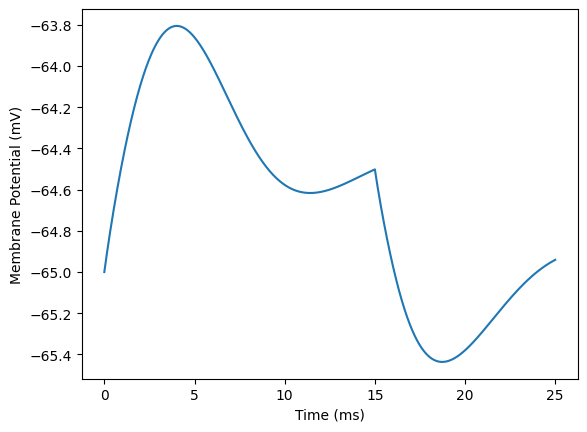

In [10]:
#FIGURE 1-D
import neuron
import matplotlib.pyplot as plt

# Create a NEURON model of a single compartment with Hodgkin-Huxley ion channels
soma = neuron.h.Section()
soma.insert('hh')

# Set the initial membrane potential and clamp the membrane current
soma(0.5).v = -90 # set initial membrane potential
clamp = neuron.h.IClamp(soma(0.5)) # create a current clamp
clamp.delay = 0 # delay before current starts
clamp.dur = 15 # duration of current injection
clamp.amp = -1.49 # amplitude of current injection

# Set up recording of the membrane potential and run the simulation
time1 = neuron.h.Vector() # create a vector to store time for the clamped simulation
voltage1 = neuron.h.Vector() # create a vector to store membrane potential for the clamped simulation
time1.record(neuron.h._ref_t) # record time for the clamped simulation
voltage1.record(soma(0.5)._ref_v) # record membrane potential for the clamped simulation
neuron.h.dt = 0.1 # set the time step for the simulation
neuron.h.tstop = 15 # set the simulation duration for the clamped simulation
neuron.h.run() # run the clamped simulation

# Release the clamp and continue the simulation
clamp.amp=1
clamp.dur = 15 # turn off the current clamp
neuron.h.tstop = 25 # set the simulation duration for the unclamped simulation
neuron.h.run() # run the unclamped simulation

# Set up recording of the membrane potential for the unclamped simulation
time2 = neuron.h.Vector() # create a vector to store time for the unclamped simulation
voltage2 = neuron.h.Vector() # create a vector to store membrane potential for the unclamped simulation
time2.record(neuron.h._ref_t) # record time for the unclamped simulation
voltage2.record(soma(0.5)._ref_v) # record membrane potential for the unclamped simulation

# Concatenate the time and voltage vectors from the clamped and unclamped simulations
time = neuron.h.Vector().append(time1).append(time2)
voltage = neuron.h.Vector().append(voltage1).append(voltage2)

# Plot the membrane potential vs time
plt.plot(time, voltage)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()
